# Outline<a class='anchor' id='outline'>
   [1. Import Package](#package)<br>
    
   [2. Import Data](#data)<br>
    
   [3. Train/Test Split](#split)<br>
    
   [4. Bulid Models](#model)<br>
   - [Step 1: Gaussian Naive Bayes](#NB)
   - [Step 2: KNN](#knn)
   - [Step 3: Logistic Regression](#log)<br>
    
   [5. Import New Data](#new)<br>
    
   [6. Result](#result)
    


# Import Package <a class='anchor' id='package'>
   [ Go to Top](#outline)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 

# Import Data<a class='anchor' id='data'>
   [ Go to Top](#outline)

In [2]:
# Read the file
df = pd.read_csv(r"/Users/homerliu/Desktop/coding/titanic/Titanic-Dataset.csv")
df = df.drop(['Name', 'Cabin'], axis=1)
# print(df.head())
# print(df.columns)

# Clean the Data<a class='anchor' id='clean'>
   [ Go to Top](#outline)

In [3]:
# Set the label on category
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex']) # male=1, female=0
df['Embarked'] = lb.fit_transform(df['Embarked'])
df['Ticket'] = lb.fit_transform(df['Ticket'])
# print(df.head())

# Check the null
# null = df.isnull().sum()
# print(null)

# Train/Test Split<a class='anchor' id='split'>

In [4]:
# Split the data
X = df.drop('Survived', axis = 1)
y = df['Survived']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Build Models<a class='anchor' id='model'>
   [ Go to Top](#outline)

## Step 1: Gaussian Naive Bayes<a class='anchor' id='NB'>

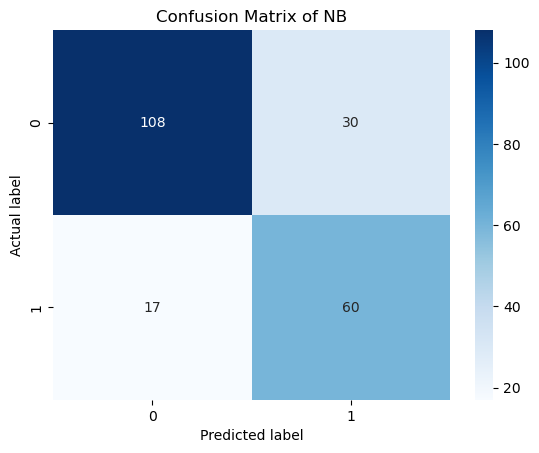

In [7]:
# NB model
model_NB = GaussianNB()
model_NB.fit(Xtrain, ytrain)
ypred_NB = model_NB.predict(Xtest)

# Confusion Matrix
cm_NB = confusion_matrix(ypred_NB, ytest)
fig_NB = sns.heatmap(cm_NB, annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix of NB')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Step 2: KNN<a class='anchor' id='knn'>

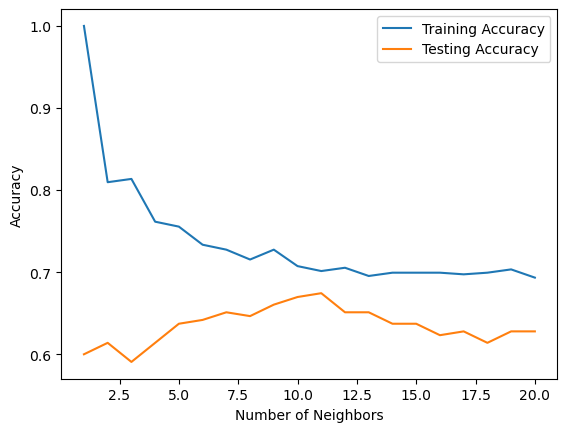

In [14]:
# Elbow Method for KNN
n = np.arange(1,21)

atrain = np.empty(20)
atest = np.empty(20)

for i, k in enumerate(n):
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(Xtrain, ytrain)
	atrain[i] = model.score(Xtrain, ytrain)
	atest[i] = model.score(Xtest, ytest)

plt.plot(n, atrain, label = 'Training Accuracy')
plt.plot(n, atest, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy') 
plt.show()


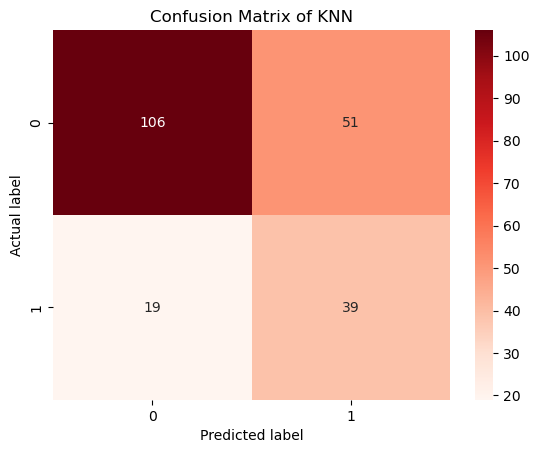

In [8]:
# KNN model
model_KNN = KNeighborsClassifier(n_neighbors = 11)
model_KNN.fit(Xtrain, ytrain)
ypred_KNN = model_KNN.predict(Xtest)

# Confusion Matrix
cm_KNN = confusion_matrix(ypred_KNN, ytest)
fig_KNN = sns.heatmap(cm_KNN, annot = True, cmap = 'Reds', fmt = 'g')
plt.title('Confusion Matrix of KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
# Score >> Test the value of K
train_score = model_KNN.score(Xtrain, ytrain)
test_score = model_KNN.score(Xtest, ytest)
print(train_score, test_score)

0.7014028056112225 0.6744186046511628


## Step 3: Logistic Regression<a class='anchor' id='log'>

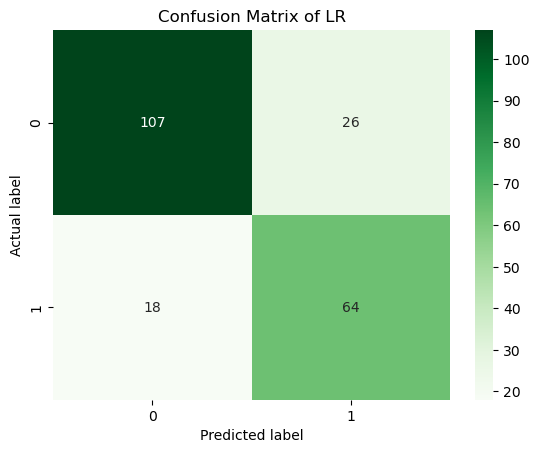

In [13]:
# Logistic Regression model
model_LR = LogisticRegression(solver='newton-cg')
model_LR.fit(Xtrain, ytrain)
ypred_LR = model_LR.predict(Xtest)

# Confusion Matrix
cm_LR = confusion_matrix(ypred_LR, ytest)
fig_LR = sns.heatmap(cm_LR, annot = True, cmap = 'Greens', fmt = 'g')
plt.title('Confusion Matrix of LR')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Import New Data of Jack<a class='anchor' id='new'>
   [ Go to Top](#outline)    

In [15]:
# New data
jack = pd.read_csv(r"/Users/homerliu/Desktop/coding/titanic/Jack_Dawson.csv")
jack = jack.drop(['Name', 'Cabin'], axis=1)

jack['Sex'] = lb.fit_transform(jack['Sex']) # male=1, female=0
jack['Embarked'] = lb.fit_transform(jack['Embarked'])
jack['Ticket'] = lb.fit_transform(jack['Ticket'])

Xnew = jack.drop('Survived', axis = 1)
jack_pred_NB = model_NB.predict(Xnew)
jack_pred_KNN = model_KNN.predict(Xnew)
jack_pred_LR = model_LR.predict(Xnew)
print("Jack Prediction:")
print(f"Result of NB: {jack_pred_NB}")
print(f"Result of KNN: {jack_pred_KNN}")
print(f"Result of LR: {jack_pred_LR}")
print(" ")

Jack Prediction:
Result of NB: [1]
Result of KNN: [1]
Result of LR: [1]
 


# Result<a class='anchor' id='result'>
   [ Go to Top](#outline)        

In [16]:
# Conditional Probability
print("Conditional Probability:")
# P(Survived = yes | Sex = male)
sum_male = 0
for i in range(0, len(df['Sex'])):
	if df['Sex'][i] == 1:
		sum_male += 1
sum_survived = 0
for i in range(0, len(df['Sex'])):
	if df['Sex'][i] == 1:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Sex = male) =", round(sum_survived/sum_male, 2))

# P(Survived = yes | Sex = female)
sum_female = 0
for i in range(0, len(df['Sex'])):
	if df['Sex'][i] == 0:
		sum_female += 1
sum_survived = 0
for i in range(0, len(df['Sex'])):
	if df['Sex'][i] == 0:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Sex = female) =", round(sum_survived/sum_female, 2))

# P(Survived = yes  | Age > 60)
sum_age_more_60 = 0
for i in range(0, len(df['Age'])):
	if df['Age'][i] > 60:
		sum_age_more_60 += 1
sum_survived = 0
for i in range(0, len(df['Age'])):
	if df['Age'][i] > 60:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Age > 60) =", round(sum_survived/sum_age_more_60, 2))

# P(Survived = yes  | Age > 20 & Age < 60)
sum_age_20_to_60 = 0
for i in range(0, len(df['Age'])):
	if df['Age'][i] > 20 and df['Age'][i] < 60:
		sum_age_20_to_60 += 1
sum_survived = 0
for i in range(0, len(df['Age'])):
	if df['Age'][i] > 20 and df['Age'][i] < 60:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Age > 20 & Age < 60) =", round(sum_survived/sum_age_20_to_60, 2))

# P(Survived = yes  | Age < 20)
sum_age_less_20 = 0
for i in range(0, len(df['Age'])):
	if df['Age'][i] < 20:
		sum_age_less_20 += 1
sum_survived = 0
for i in range(0, len(df['Age'])):
	if df['Age'][i] < 20:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Age < 20) =", round(sum_survived/sum_age_less_20, 2))

# P(Survived = yes  | Pclass = 1)
sum_pclass_1 = 0
for i in range(0, len(df['Pclass'])):
	if df['Pclass'][i] == 1:
		sum_pclass_1 += 1
sum_survived = 0
for i in range(0, len(df['Pclass'])):
	if df['Pclass'][i] == 1:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Pclass = 1) =", round(sum_survived/sum_pclass_1, 2))

# P(Survived = yes  | Pclass = 2)
sum_pclass_2 = 0
for i in range(0, len(df['Pclass'])):
	if df['Pclass'][i] == 2:
		sum_pclass_2 += 1
sum_survived = 0
for i in range(0, len(df['Pclass'])):
	if df['Pclass'][i] == 2:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Pclass = 2) =", round(sum_survived/sum_pclass_2, 2))

# P(Survived = yes  | Pclass = 3)
sum_pclass_3 = 0
for i in range(0, len(df['Pclass'])):
	if df['Pclass'][i] == 3:
		sum_pclass_3 += 1
sum_survived = 0
for i in range(0, len(df['Pclass'])):
	if df['Pclass'][i] == 3:
		if df['Survived'][i] == 1:
			sum_survived += 1
print("P(Survived = yes | Pclass = 3) =", round(sum_survived/sum_pclass_3, 2))

# P(Survived = yes | Sex = female, Age < 20, Pclass = 1)
sum = 0
for i in range(0, len(df['Pclass'])):
	if df['Sex'][i] == 0:
		if df['Age'][i] < 20:
			if df['Pclass'][i] == 1:
				sum += 1
sum_survived = 0
for i in range(0, len(df['Pclass'])):
	if df['Sex'][i] == 0:
		if df['Age'][i] < 20:
			if df['Pclass'][i] == 1:
				if df['Survived'][i] == 1:
					sum_survived += 1
print("P(Survived = yes | Sex = female, Age < 20, Pclass = 1) = ",round(sum_survived/sum, 2))

# P(Survived = yes | Sex = female, Age > 60, Pclass = 1)
sum = 0
for i in range(0, len(df['Pclass'])):
	if df['Sex'][i] == 0:
		if df['Age'][i] > 60:
			if df['Pclass'][i] == 1:
				sum += 1
sum_survived = 0
for i in range(0, len(df['Pclass'])):
	if df['Sex'][i] == 0:
		if df['Age'][i] > 60:
			if df['Pclass'][i] == 1:
				if df['Survived'][i] == 1:
					sum_survived += 1
print("P(Survived = yes | Sex = female, Age > 60, Pclass = 1) = ",round(sum_survived/sum, 2))


Conditional Probability:
P(Survived = yes | Sex = male) = 0.21
P(Survived = yes | Sex = female) = 0.75
P(Survived = yes | Age > 60) = 0.23
P(Survived = yes | Age > 20 & Age < 60) = 0.39
P(Survived = yes | Age < 20) = 0.48
P(Survived = yes | Pclass = 1) = 0.66
P(Survived = yes | Pclass = 2) = 0.48
P(Survived = yes | Pclass = 3) = 0.24
P(Survived = yes | Sex = female, Age < 20, Pclass = 1) =  0.93
P(Survived = yes | Sex = female, Age > 60, Pclass = 1) =  1.0
